# Spider Inductions '19 - Tronix

### By S P Sharan
### Machine Learning Task 1 - Basic

#### Problem Statement!
The Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system has lost the locations of
some of the crimes in Chicago. They need an approximate location of the crime from the remaining data. The dataset is 
available with the police department and it reflects reported incidents of crime (with the exception of murders where 
data exists for each victim) that occurred in the City of Chicago from 2012 to 2017.

For the lost locations the related data to those locations is still with Police Department. You are given the data 
related to lost locations of the city. Your task is to predict the exact location of the Crime by the help Neural 
Networks algorithm.

# Let's get on with the Task

## Imports
The basic set of data analysis tool...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

The data is given in the form of .csv files.

In [3]:
data = pd.read_csv('train.csv')
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,9997156,HY187464,03/16/2015 10:55:00 PM,037XX N BERNARD ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,APARTMENT,False,True,...,35.0,16.0,04A,1152724.0,1924681.0,2015,08/17/2015 03:03:40 PM,41.949183,-87.714011,"(41.949183466, -87.714010731)"
1,8503988,HV180396,03/02/2012 01:00:00 PM,096XX S MICHIGAN AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,...,6.0,49.0,18,1178850.0,1841009.0,2012,02/04/2016 06:33:39 AM,41.719023,-87.620529,"(41.71902307, -87.620528559)"
2,10756290,HZ518998,11/17/2016 01:35:00 PM,030XX E 79TH ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,True,False,...,7.0,46.0,26,1197746.0,1853168.0,2016,11/24/2016 03:48:31 PM,41.751938,-87.550915,"(41.75193817, -87.550915052)"
3,10187054,HY374963,08/09/2015 03:25:00 AM,040XX N PULASKI RD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,GAS STATION,False,True,...,39.0,16.0,08B,1149007.0,1926448.0,2015,08/17/2015 03:03:40 PM,41.954105,-87.727628,"(41.954105142, -87.727628041)"
4,9607779,HX258115,05/12/2014 01:10:00 AM,018XX W LAWRENCE AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,47.0,4.0,08B,1163385.0,1931915.0,2014,02/04/2016 06:33:39 AM,41.968816,-87.674618,"(41.968815819, -87.674618145)"
5,9088992,HW233922,04/15/2013 07:45:00 AM,079XX S LOOMIS BLVD,0810,THEFT,OVER $500,VACANT LOT/LAND,False,False,...,21.0,71.0,06,1168378.0,1852049.0,2013,02/04/2016 06:33:39 AM,41.749550,-87.658567,"(41.749549955, -87.658567035)"
6,8479895,HV156457,02/12/2012 10:40:00 AM,061XX W GIDDINGS ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,38.0,15.0,26,1134577.0,1930912.0,2012,02/04/2016 06:33:39 AM,41.966622,-87.780569,"(41.966622408, -87.780569492)"
7,8703745,HV379698,07/12/2012 06:12:00 PM,051XX S HYDE PARK BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,PARK PROPERTY,False,False,...,4.0,41.0,03,1188290.0,1871467.0,2012,02/04/2016 06:33:39 AM,41.802383,-87.584983,"(41.802382851, -87.584982858)"
8,8530062,HV207336,03/21/2012 02:35:00 AM,0000X W ILLINOIS ST,2027,NARCOTICS,POSS: CRACK,ALLEY,True,False,...,42.0,8.0,18,1176064.0,1903603.0,2012,02/04/2016 06:33:39 AM,41.890850,-87.628854,"(41.890849769, -87.628853572)"
9,10438860,HZ177428,03/07/2016 05:38:00 AM,0000X E LAKE ST,0320,ROBBERY,STRONGARM - NO WEAPON,SMALL RETAIL STORE,True,False,...,42.0,32.0,03,1176905.0,1901744.0,2016,03/17/2016 03:50:16 PM,41.885730,-87.625821,"(41.885729587, -87.625821329)"


# Data Analysis

## Basic Stuff
A few insights about the size and available features...

In [4]:
data.shape

(874027, 22)

8.7 lakhs training examples.. Massive!

In [5]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874027 entries, 0 to 874026
Data columns (total 22 columns):
ID                      874027 non-null int64
Case Number             874027 non-null object
Date                    874027 non-null object
Block                   874027 non-null object
IUCR                    874027 non-null object
Primary Type            874027 non-null object
Description             874027 non-null object
Location Description    873102 non-null object
Arrest                  874027 non-null bool
Domestic                874027 non-null bool
Beat                    874027 non-null int64
District                874026 non-null float64
Ward                    874019 non-null float64
Community Area          873996 non-null float64
FBI Code                874027 non-null object
X Coordinate            851772 non-null float64
Y Coordinate            851772 non-null float64
Year                    874027 non-null int64
Updated On              874027 non-null objec

Looks like some of the entries are missing. How much though?

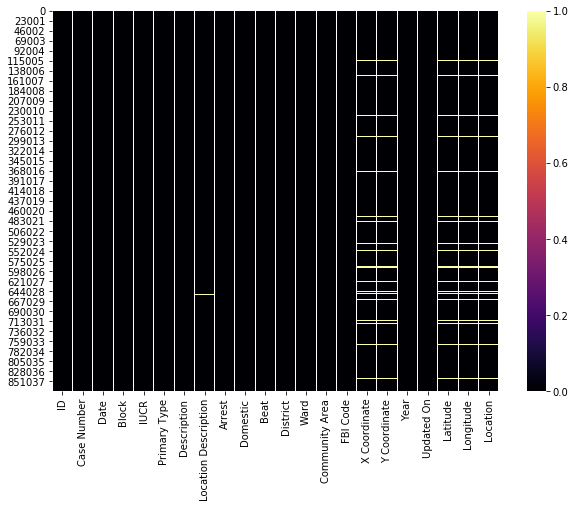

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.isnull(),
            cmap='inferno')

## Deeper analysis of missing data
I wonder how Chicago looks like...

In [13]:
data['Latitude'].describe()

count    851772.000000
mean         41.841432
std           0.095097
min          36.619446
25%          41.767848
50%          41.857969
75%          41.905251
max          42.022710
Name: Latitude, dtype: float64

In [14]:
data['Longitude'].describe()

count    851772.000000
mean        -87.672274
std           0.067312
min         -91.686566
25%         -87.715305
50%         -87.666164
75%         -87.628116
max         -87.524529
Name: Longitude, dtype: float64

In [15]:
center = [data['Latitude'].mean(), data['Longitude'].mean()]

In [16]:
m = folium.Map(location=center,
               width='100%',
               height='100%',
               zoom_start=12,         
               tiles="CartoDB positron ")

In [17]:
m

From the given data, seems like Community Area is the largest form of areal classification. It will better help in the 
understanding of which features are important and correlate well for the neural network we will feed later on.

In [18]:
ca = data.groupby('Community Area').first().loc[:, ['Latitude', 'Longitude']]
for i in range(len(ca)):
    x, y = ca.iloc[i][0], ca.iloc[i][1]
    folium.Marker([x, y]).add_to(m)
m

* The Chicago Looks like a vertical strip. 
* So maybe we will be having these community areas to be correlated with the longitude that we need to predict. 
* The smallest subdivision of area is what will actually give us the precise location along with a good accuracy. 
* I feel the blocks are the best. Let's see if they truly are...

## What are good features?

**My Thoughts** <br>
It's better to take just as few features as we can to reduce load and to keep the problem as a true ML problem. Having too many will start to overfit and destroy the purpose of generating the data. 
The smallest subdivision of area will give use the best estimate of the location as accuracy and precision will be great. 


Also, having an additional broader feature will help too just in case if smaller features start overlapping and destroy our predictions altogether 😂.

In [19]:
block = data[['Block', 'Latitude', 'Longitude']]
block.sort_values('Block', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
block.groupby('Block').first().sort_values('Latitude')

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Latitude,Longitude
Block,,
099XX S CONFIDENTIAL,36.619446,-91.686566
022XX N KENNEDY EXPY IB,36.619446,-91.686566
099XX S CONFIDENTIAL ST,36.619446,-91.686566
035XX W 54TH PL,36.619446,-91.686566
061XX S PARK SHORE EAST CT,36.619446,-91.686566
130XX S LANGLEY AVE,36.619446,-91.686566
063XX W KENNEDY EXPY IB,36.619446,-91.686566
065XX S CHICAGO SKYWAY EXPY OB,36.619446,-91.686566
072XX S ADA ST,36.619446,-91.686566


---
* There are about 31.6K blocks which are noted in Chicago. These will therefore be of good value to be features as the amount of precision that I see from them is pretty good.

The beat too seem to be of good value as a large number of beats are present. Let's see how they compare with our blocks...

---

In [20]:
beat = data[['Beat', 'Latitude', 'Longitude']]
beat.sort_values('Beat', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
beat.groupby('Beat').first().sort_values('Latitude')

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Latitude,Longitude
Beat,,
533,41.657845,-87.597608
532,41.665428,-87.621215
523,41.668302,-87.637979
522,41.677155,-87.626269
524,41.681524,-87.635227
2212,41.685703,-87.678876
2234,41.686365,-87.650708
531,41.688347,-87.608324
433,41.691410,-87.541317


---
The beats are good too but still they are inferior to the blocks as of now. A few more insights are required if you ask me...

---

In [27]:
block_test = data[['Block', 'Latitude', 'Longitude']]
print(f"{len(block_test['Block'].unique())} Number of blocks are present")
block_test.dropna(inplace=True)
print(f"{len(block_test['Block'].unique())} Number of blocks with known location")

31618 Number of blocks are present
31498 Number of blocks with known location


C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
beat_test = data[['Beat', 'Latitude', 'Longitude']]
print(f"{len(beat_test['Beat'].unique())} Number of beats are present")
beat_test.dropna(inplace=True)
print(f"{len(beat_test['Beat'].unique())} Number of beats with known location")

302 Number of beats are present
302 Number of beats with known location


C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Let's Shift our attention
We will revisit the smaller features in some time. A correlation plot of the given data will enhance the image of our understanding

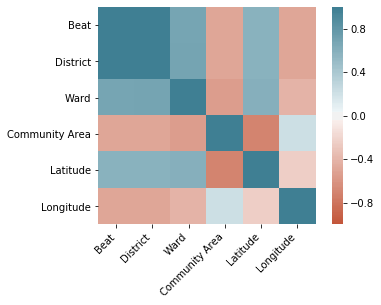

In [31]:
useful = data[['Block', 'IUCR', 'Beat', 'District', 'Ward', 'Community Area', 'Latitude', 'Longitude', 'Location']]
corr = useful.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

---
The latitudes seem to perform well with any of the features although the longitudes seems to be partial only to the community area as I had thought before.. **So our decision of using the community area is final.** And the beats too surprisingly don't seem to perform as good as I thought 💭💭

---

In [32]:
data.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      925
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                        8
Community Area             31
FBI Code                    0
X Coordinate            22255
Y Coordinate            22255
Year                        0
Updated On                  0
Latitude                22255
Longitude               22255
Location                22255
dtype: int64

---
About 22K of data seems to be missing and from above observations, the **Block and and the Community Area** will be selected to be our features...

# Preprocessing

## Organising
* The Blocks will have to be converted to integers as neural networks cannot take strings as inputs... We will map our blocks to specific integers.
* Also, we will remove the unnecessary columns

In [33]:
blocks_list = data['Block'].unique().tolist()

In [35]:
def block_to_int(name):
    try:
        i = blocks_list.index(name)
    except ValueError:
        blocks_list.append(name)
        i = blocks_list.index(name)
    return i

In [39]:
from IPython.display import clear_output
def preprocess(train):
    train.drop(columns=['ID', 'Case Number', 'Date', 'IUCR', 'Primary Type',
                        'Description', 'Location Description', 'Arrest', 
                        'Domestic', 'Beat', 'District', 'Ward', 'FBI Code', 
                        'X Coordinate', 'Y Coordinate', 'Year', 'Updated On',
                        'Location'],
               inplace=True,
               errors='ignore')
    train.dropna(axis=0, how='any', thresh=None, inplace=True)
    for i, row in train.iterrows():
        if isinstance(row['Block'], str):
            train.set_value(i, 'Block', block_to_int(row['Block']))
            if not i % 1000:
                clear_output(wait=True)
                print(i)

In [37]:
train = pd.read_csv('train.csv')
val = pd.read_csv('cross_val.csv')
test = pd.read_csv('test.csv')

In [40]:
preprocess(train)

874000


In [42]:
preprocess(test)

291000


In [43]:
preprocess(val)

291000


In [41]:
train.isna().sum()

Block             0
Community Area    0
Latitude          0
Longitude         0
dtype: int64

---
I had made a mistake by doing any computations with pandas. Numpy is much efficient by speed and memory. I will convert it to numpy and proceed.

---

In [44]:
np.save('Final/train', train.to_numpy())
np.save('Final/test', test.to_numpy())
np.save('Final/val', val.to_numpy())
print("Converted all and saved")

Converted all and saved


## Scaling and Normalisation
Now that we have our data in hand, it's important to scale it down before passing through our neural network.  

In [106]:
train = np.load('Final//train.npy', allow_pickle=True)
test = np.load('Final/test.npy', allow_pickle=True)
val = np.load('Final/val.npy', allow_pickle=True)

---
We  will apply mean scaling and batch normalisation using two helper function. The formulae are pretty straightforward, easy to derive..

We will have our final training data between (-10, 10)

---

In [107]:
max_tot = np.vstack([train,test,val]).max(axis=0)
min_tot = np.vstack([train,test,val]).min(axis=0)

In [53]:
def scale_norm(train):
    scaled = (2 * train - (max_tot + min_tot)) / (max_tot - min_tot) * 10
    return scaled

def revert(train):
    try:
        revert = (train * (max_tot[-2:] - min_tot[-2:]) / 10 + (max_tot[-2:] + min_tot[-2:])) / 2
    except:
        revert = (train * (max_tot - min_tot) / 10 + (max_tot + min_tot)) / 2
    return np.array(revert, dtype=np.float)

In [54]:
scale_norm(train)

array([[-10.0, -5.844155844155844, 9.72784535979896, 9.089477654354681],
       [-9.999388734374522, 2.727272727272727, 8.875914272064046,
        9.538691285025056],
       [-9.998777468749045, 1.948051948051948, 8.997748425260005,
        9.873207862401522],
       ...,
       [-1.0908035086646903, 7.142857142857143, 9.028261848910189,
        9.220274466293878],
       [-8.60692563953666, -3.5064935064935066, 9.581354558508423,
        8.92790713681007],
       [-2.452092056603197, -6.103896103896104, 9.770068744137424,
        8.876986994740601]], dtype=object)

In [55]:
revert(scale_norm(train))

array([[ 0.00000000e+00,  1.60000000e+01,  4.19491835e+01,
        -8.77140107e+01],
       [ 1.00000000e+00,  4.90000000e+01,  4.17190231e+01,
        -8.76205286e+01],
       [ 2.00000000e+00,  4.60000000e+01,  4.17519382e+01,
        -8.75509151e+01],
       ...,
       [ 1.45750000e+04,  6.60000000e+01,  4.17601818e+01,
        -8.76867917e+01],
       [ 2.27900000e+03,  2.50000000e+01,  4.19096070e+01,
        -8.77476338e+01],
       [ 1.23480000e+04,  1.50000000e+01,  4.19605907e+01,
        -8.77582304e+01]])

In [56]:
train

array([[0, 16.0, 41.949183466, -87.714010731],
       [1, 49.0, 41.71902307, -87.620528559],
       [2, 46.0, 41.75193817, -87.55091505200001],
       ...,
       [14575, 66.0, 41.760181773, -87.686791677],
       [2279, 25.0, 41.909607048000005, -87.747633849],
       [12348, 15.0, 41.960590669, -87.75823042299999]], dtype=object)

**By the above 3 calculations, it's evident that our functions are in proper shape**

We can proceed to making the neural network

In [57]:
x_train, y_train = scale_norm(train)[:, 0:2], scale_norm(train)[:, 2:4]
x_val, y_val = scale_norm(val)[:, 0:2], scale_norm(val)[:, 2:4]
x_test, y_test = scale_norm(test)[:, 0:2], scale_norm(test)[:, 2:4]

# The Model

## Training
We will use the model architecture of 
* 2 input neurons ➡ W1,b1 + Relu
* 512 Hidden neurons in hidden layer ➡ W2,b2 + Linear
* 2 output neurons ➡ 😃 

Pretty straightforward eh?
We will also select a learning rate of 0.0012. 
These parameters were selected using TensorBoard for visualizing performance with different hyperparameters.

We will have a class that manages the neural network. This way, it eliminates the need for all messy variables and lots of functions which are even not as memory efficient due to repetitive copying of variables

![](assets/4.png)

![](assets/2.png)

![1](assets/1.png)

**The above pictures are from the course Neural Networks from DeepLearning.AI by Andrew NG and stand as the foundation for the proceeding**

![](assets/5.png)
![](assets/6.png)

In [97]:
class NeuralNetwork:
    def __init__(self):
        np.random.seed(1)
        self.W1 = np.random.randn(512, 2) * 0.01
        self.b1 = np.zeros((512, 1))
        self.W2 = np.random.randn(2, 512) * 0.01
        self.b2 = np.zeros((2, 1))
        self.Z1 = None
        self.A1 = None
        self.Z2 = None
        self.A2 = None
        self.dZ2 = None
        self.dW2 = None
        self.db2 = None
        self.dZ1 = None
        self.dW1 = None
        self.db1 = None
    
    def load_weights(self, weights):
        self.W1 = weights[0].T
        self.b1 = weights[1].T
        self.W2 = weights[2].T
        self.b2 = weights[3].T
    
    def get_weights(self):
        weights = []
        weights.append(self.W1.T)
        weights.append(self.b1.T)
        weights.append(self.W2.T)
        weights.append(self.b2.T)
        return weights
    
    @staticmethod
    def _relu(x, deriv=False):
        z = np.copy(x)
        if deriv:
            z[z<=0] = 0
            z[z>0] = 1
            return z
        z[z<=0] = 0
        return z
    
    @staticmethod
    def _linear(z):
        return z
    
    def forward_prop(self, X, predict=False):
        self.Z1 = np.dot(self.W1, X.T) + self.b1
        self.A1 = self._relu(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self._linear(self.Z2)
        if predict:
            return self.A2.T
    
    def cost_function(self, Y):
        m = Y.shape[0]
        squared_errors = np.square(self.A2 - Y.T)
        cost = np.sum(squared_errors) / (2 * m)
        return np.squeeze(cost)
    
    def back_prop(self, X, Y):
        m = Y.shape[0]
        self.dZ2 = self.A2 - Y.T
        self.dW2 = np.dot(self.dZ2, self.A1.T) / m
        self.db2 = np.sum(self.dZ2, axis=1, keepdims=True) / m
        self.dZ1 = np.multiply(np.dot(self.W2.T, self.dZ2), self._relu(self.Z1, deriv=True))
        self.dW1 = np.dot(self.dZ1, X) / m
        self.db1 = np.sum(self.dZ1, axis=1, keepdims=True) / m
    
    def grad_descent(self, lr=0.0012):
        self.W1 = self.W1 - lr * self.dW1
        self.b1 = self.b1 - lr * self.db1
        self.W2 = self.W2 - lr * self.dW2
        self.b2 = self.b2 - lr * self.db2

model = NeuralNetwork()

$Note$ : 
* Initially I had a problem with memory management as having 512 neurons and dealing with 8 Lakhs samples proved to crash my system or raise Memory errors.
* To deal with it I first attempted to reduce all variables and weights to a np.float16/32 datatype. This worked... though, the accuracy that was possible was never achieved due to lack of precision I delt with when reducing the datatype size.

* So I started training in batches of 10,000 rows and iterating over them for each epoch.
* The model was trained for about 150 Epochs after which the loss converging to a 'really good value' of 0.02 and still decreasing

The training logs have been removed as they are very long. But the model can be retrained any time or can be loaded from the weights and tested using helper functions of the class.

For the first 20 Epochs, using a value of 1,000 instead of 10,000 in the places marked with '⮜' works good as we just take about 10% data and work with it to get the weights from vague values to little closer to actual ones. But this cannot be done for more than 20 epochs as due to the size of the model architecture, we tend to overfit to those 10%... After those 1st 20 epochs, reverting to the actual value of 10,000 starts to fit to the model properly and we can continue until we like it.

In [ ]:
EPOCHS = 500

for i in range(EPOCHS):
  for ii in range(0,
                 len(x_train),
                 10_000):
      model.forward_prop(x_train[ii:ii+10_000,:]) # ⮜
      loss = model.cost_function(y_train[ii:ii+10_000,:]) # ⮜
      model.back_prop(x_train[ii:ii+10_000,:], y_train[ii:ii+10_000,:]) # ⮜
      model.grad_descent()
      if not ii % 1_00_000:
        print(f"{i + 1} EPOCHS : {ii} : Batches Train Loss : {loss}")

In [98]:
model.get_weights()[0].shape

(2, 512)

In [99]:
model.get_weights()[1].shape

(1, 512)

In [100]:
model.get_weights()[2].shape

(512, 2)

In [101]:
model.get_weights()[3].shape

(1, 2)

## Predicting

The trained weights are enclosed in the weights folder in a numpy format

In [91]:
wts = np.load('Weights/wts.npy', allow_pickle=True)

In [92]:
wts[0].shape

(2, 512)

In [93]:
wts[1].shape

(1, 512)

In [94]:
wts[2].shape

(512, 2)

In [95]:
wts[3].shape

(1, 2)

We will test this model against the validation data set. You can use the $model.forward_prop$ method by toggling predict flag to be true

In [103]:
model.load_weights(wts)

### Validation Data

In [108]:
revert(model.forward_prop(x_val[:10,:], predict=True))

array([[ 41.8692541 , -87.72951417],
       [ 41.69804245, -87.59727175],
       [ 41.73868964, -87.65443003],
       [ 41.7064008 , -87.58930563],
       [ 41.89024364, -87.71661451],
       [ 41.99253258, -87.72642697],
       [ 41.88128797, -87.72332527],
       [ 41.925411  , -87.75003793],
       [ 41.88709518, -87.63813088],
       [ 41.84794932, -87.68343248]])

In [111]:
print(f"Loss : {model.cost_function(y_val[:10,:])}")

Loss : 0.01013507951436637


A loss of 0.01 over a MSE cost function is pretty impressive, lets try it on the whole dataset...

In [116]:
y_prediction = []
for i in range(0,
              len(x_val),
              10_000):
    try:
        y_prediction = np.vstack((np.squeeze(y_prediction),
                                np.squeeze(model.forward_prop(x_val[i:i+10_000,:], predict=True))))
    except:
        y_prediction = model.forward_prop(x_val[i:i+10_000,:], predict=True)
    if not i % 50_000:
        print(f"{i} predictions done")

0 predictions done
50000 predictions done
100000 predictions done
150000 predictions done
200000 predictions done
250000 predictions done


In [118]:
y_prediction.shape

(283991, 2)

In [119]:
y_val.shape

(283991, 2)

**Our moment of truth of the predctions!!**

In [126]:
truth = np.isclose(revert(y_prediction),
                   revert(y_val),
                   atol=0.1,
                   rtol=0.0045)

In [127]:
len(np.where(truth == False)[0])

26

---
The above functions use absolute tolerance and relative tolerance to measure the closeness between the float objects. 
We achieve a very good result of **only 26 predictions having an error above 0.45%** out of about 3 lakhs samples!!! 👌👌

This suggests that our model is so accurate that it can almost be used in real world application!! 

---

# Acknowledgement
I am deeply thankful to Andrew NG, SentDex, Siraj Rival and numerous other scholars around the globe who share their knowledge for free.
I am also thankful to my mentor and senior, Yash Patel who was helpful and promptly guided me through the task without who, it may not have been as smooth